In [41]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
import nltk
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
df = pd.read_excel('Data/Fake News (sa-news.com) Fake.xlsx')
df.head()

,Date,Title,Text,URL,Medium
0,11/09/2020,VIDEO: Bystanders Stop Self Confessed Muslim P...,"Thanks to the quick action of bystanders, the ...",https://sa-news.com/video-bystanders-stop-self...,sa-news
1,11/09/2020,"\""F*ck You White Man\"" – Well Known Farmer Sur...",While Mainstream Media are pandering to black ...,https://sa-news.com/fck-you-white-man-well-kno...,sa-news
2,10/09/2020,VIDEO: Whole Troop of EMPD Officers Abuse & Th...,ABOVE THE LAW? #PoliceBrutality A man who had ...,https://sa-news.com/video-whole-troop-of-empd-...,sa-news
3,09/09/2020,VIDEO: Hero Ouma Pulls Gun on Racist EFF Prote...,During an altercation with EFF protesters outs...,https://sa-news.com/video-hero-ouma-pulls-gun-...,sa-news
4,08/09/2020,"#SanctionSA Racist ANC Lied to UN: \""Merit, an...",SA SANCTIONS: By the ANC’s own 50 year old dem...,https://sa-news.com/sanctionsa-racist-anc-lied...,sa-news


In [43]:
text = df['Text']

Change to all lower case

In [44]:
text = text.str.lower()

In [45]:
text.head()

0    thanks to the quick action of bystanders, the ...
1    while mainstream media are pandering to black ...
2    above the law? #policebrutality a man who had ...
3    during an altercation with eff protesters outs...
4    sa sanctions: by the anc’s own 50 year old dem...
Name: Text, dtype: object

Removing StopWords

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trmyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
stopWords = stopwords.words('english')
stopWords = set(stopWords)

In [48]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopWords])

In [49]:
text = text.apply(lambda text: cleaning_stopwords(text))
text.head()

0    thanks quick action bystanders, brazen kidnap ...
1    mainstream media pandering black people’s hurt...
2    law? #policebrutality man seen confronted empd...
3    altercation eff protesters outside clicks stor...
4    sa sanctions: anc’s 50 year old demands, world...
Name: Text, dtype: object

Remove Punctuations

In [50]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [51]:
text = text.apply(lambda text: cleaning_punctuations(text))
text.head()

0    thanks quick action bystanders brazen kidnap a...
1    mainstream media pandering black people’s hurt...
2    law policebrutality man seen confronted empd o...
3    altercation eff protesters outside clicks stor...
4    sa sanctions anc’s 50 year old demands world r...
Name: Text, dtype: object

Remove Emojis and URLs

In [52]:
import emoji

In [53]:
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text

In [54]:
text = text.apply(lambda text: give_emoji_free_text(text))
text = text.apply(lambda text: url_free_text(text))

In [55]:
text.head()

0    thanks quick action bystanders brazen kidnap a...
1    mainstream media pandering black people’s hurt...
2    law policebrutality man seen confronted empd o...
3    altercation eff protesters outside clicks stor...
4    sa sanctions anc’s 50 year old demands world r...
Name: Text, dtype: object

Remove numbers

In [56]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [57]:
text = text.apply(lambda text: cleaning_numbers(text))
text.head()

0    thanks quick action bystanders brazen kidnap a...
1    mainstream media pandering black people’s hurt...
2    law policebrutality man seen confronted empd o...
3    altercation eff protesters outside clicks stor...
4    sa sanctions anc’s  year old demands world rug...
Name: Text, dtype: object

Remove said

In [58]:
def cleaning_RT(data):
    return re.sub('anc', '', data)

In [59]:
text = text.apply(lambda text: cleaning_RT(text))
text.head()

0    thanks quick action bystanders brazen kidnap a...
1    mainstream media pandering black people’s hurt...
2    law policebrutality man seen confronted empd o...
3    altercation eff protesters outside clicks stor...
4    sa stions ’s  year old demands world rugby int...
Name: Text, dtype: object

In [60]:
textcopy = text.copy()

Tokenize

In [61]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trmyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
C:\Users\trmyi\AppData\Local\Temp/ipykernel_16928/4204352487.py:2: DeprecationWarning: invalid escape sequence \w
  tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')


In [63]:
text = text.apply(lambda text: tokenizer.tokenize(text))

In [64]:
text.head()

0    [thanks, quick, action, bystanders, brazen, ki...
1    [mainstream, media, pandering, black, people, ...
2    [law, policebrutality, man, seen, confronted, ...
3    [altercation, eff, protesters, outside, clicks...
4    [sa, stions, ’s, year, old, demands, world, ru...
Name: Text, dtype: object

Stemming

In [65]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [66]:
text = text.apply(lambda text: stemming_on_text(text))
text.head()

0    [thanks, quick, action, bystanders, brazen, ki...
1    [mainstream, media, pandering, black, people, ...
2    [law, policebrutality, man, seen, confronted, ...
3    [altercation, eff, protesters, outside, clicks...
4    [sa, stions, ’s, year, old, demands, world, ru...
Name: Text, dtype: object

Lemmatize

In [67]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [68]:
text = text.apply(lambda text: lemmatizer_on_text(text))
text.head()

0    [thanks, quick, action, bystanders, brazen, ki...
1    [mainstream, media, pandering, black, people, ...
2    [law, policebrutality, man, seen, confronted, ...
3    [altercation, eff, protesters, outside, clicks...
4    [sa, stions, ’s, year, old, demands, world, ru...
Name: Text, dtype: object

Visualize

In [69]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(textcopy)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

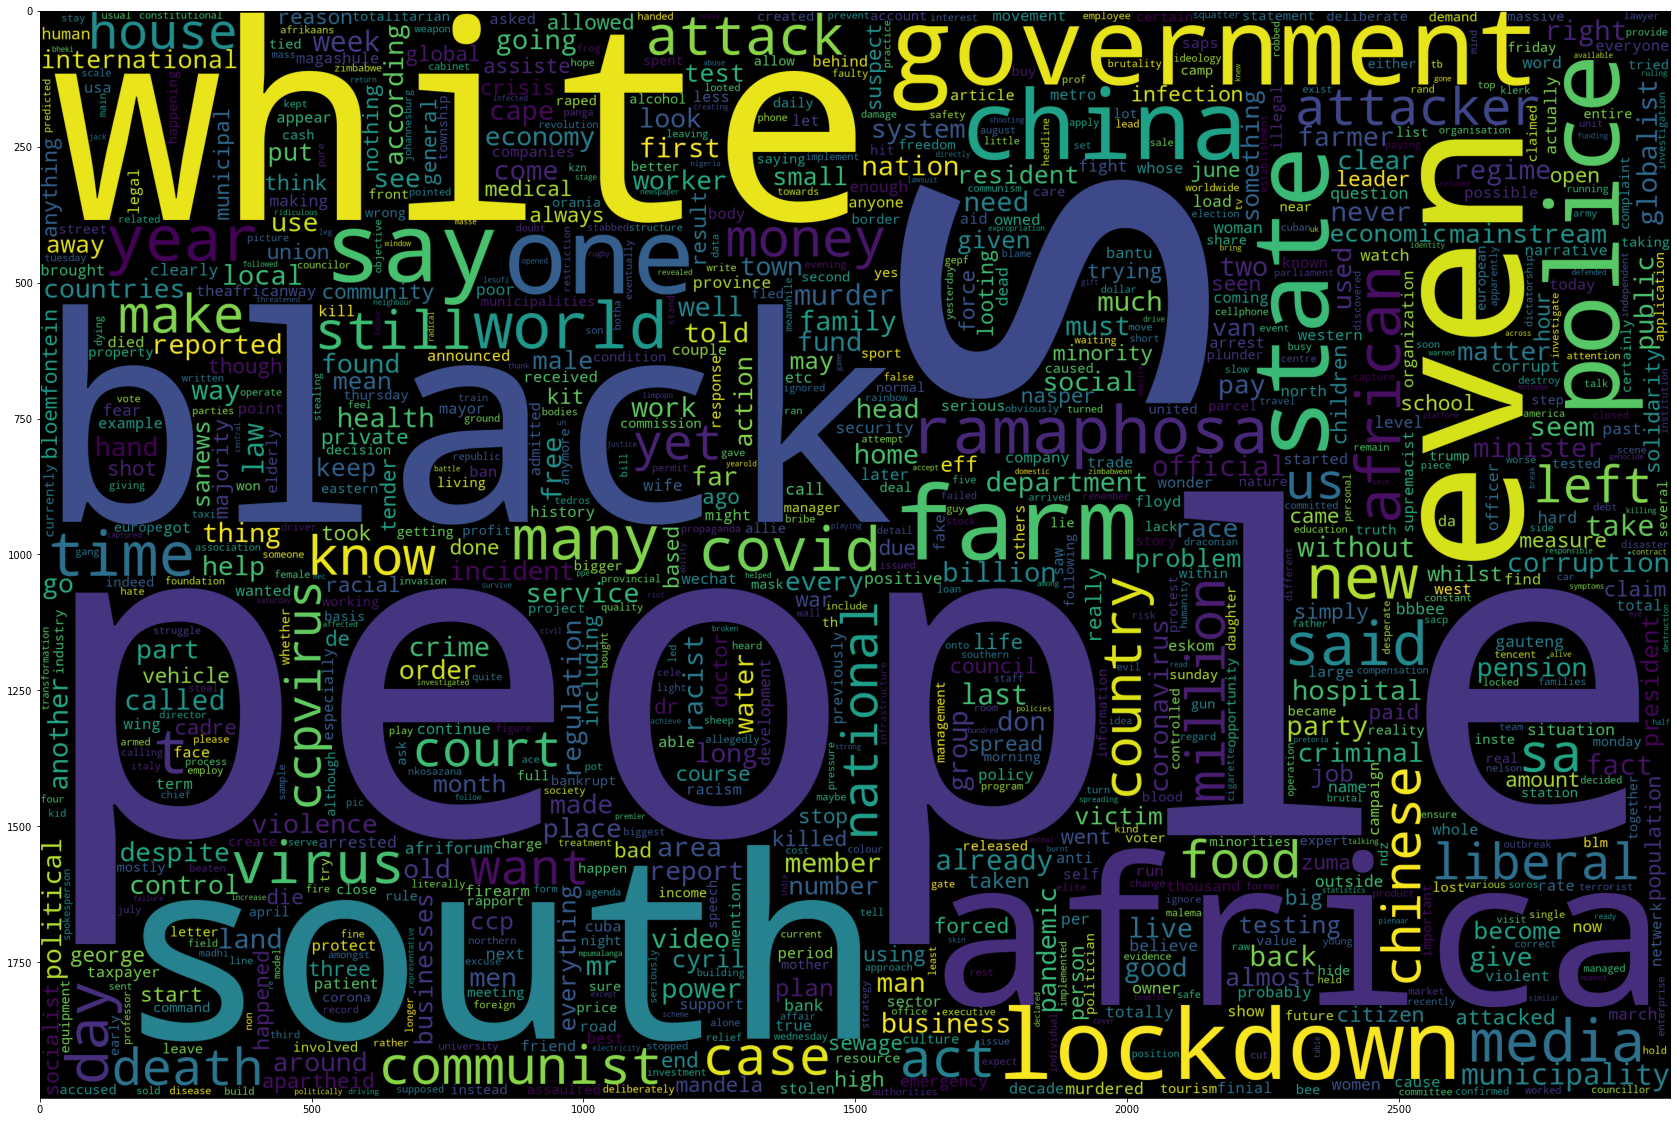

In [70]:
wc = WordCloud(max_words = 1000 , width = 3000 , height = 2000,
               collocations=False).generate(" ".join(textcopy))
plt.figure(figsize=(30,20))
plt.imshow(wc)

LDA

In [71]:
from gensim import corpora

dictionary = corpora.Dictionary(text)
corpus = [dictionary.doc2bow(tex) for tex in text]

In [72]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [73]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [74]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"farm" + 0.009*"china" + 0.008*"–" + 0.008*"black"')
(1, '0.009*"’s" + 0.007*"people" + 0.006*"south" + 0.006*"africa"')
(2, '0.012*"’s" + 0.007*"people" + 0.007*"africa" + 0.006*"south"')
(3, '0.010*"people" + 0.010*"’s" + 0.007*"black" + 0.007*"also"')
(4, '0.010*"police" + 0.007*"’s" + 0.007*"also" + 0.005*"people"')


In [75]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [76]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\trmyi\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
